In [ ]:
# %pip install matplotlib numpy

Plot saved as 'timing_attack_histogram.png'


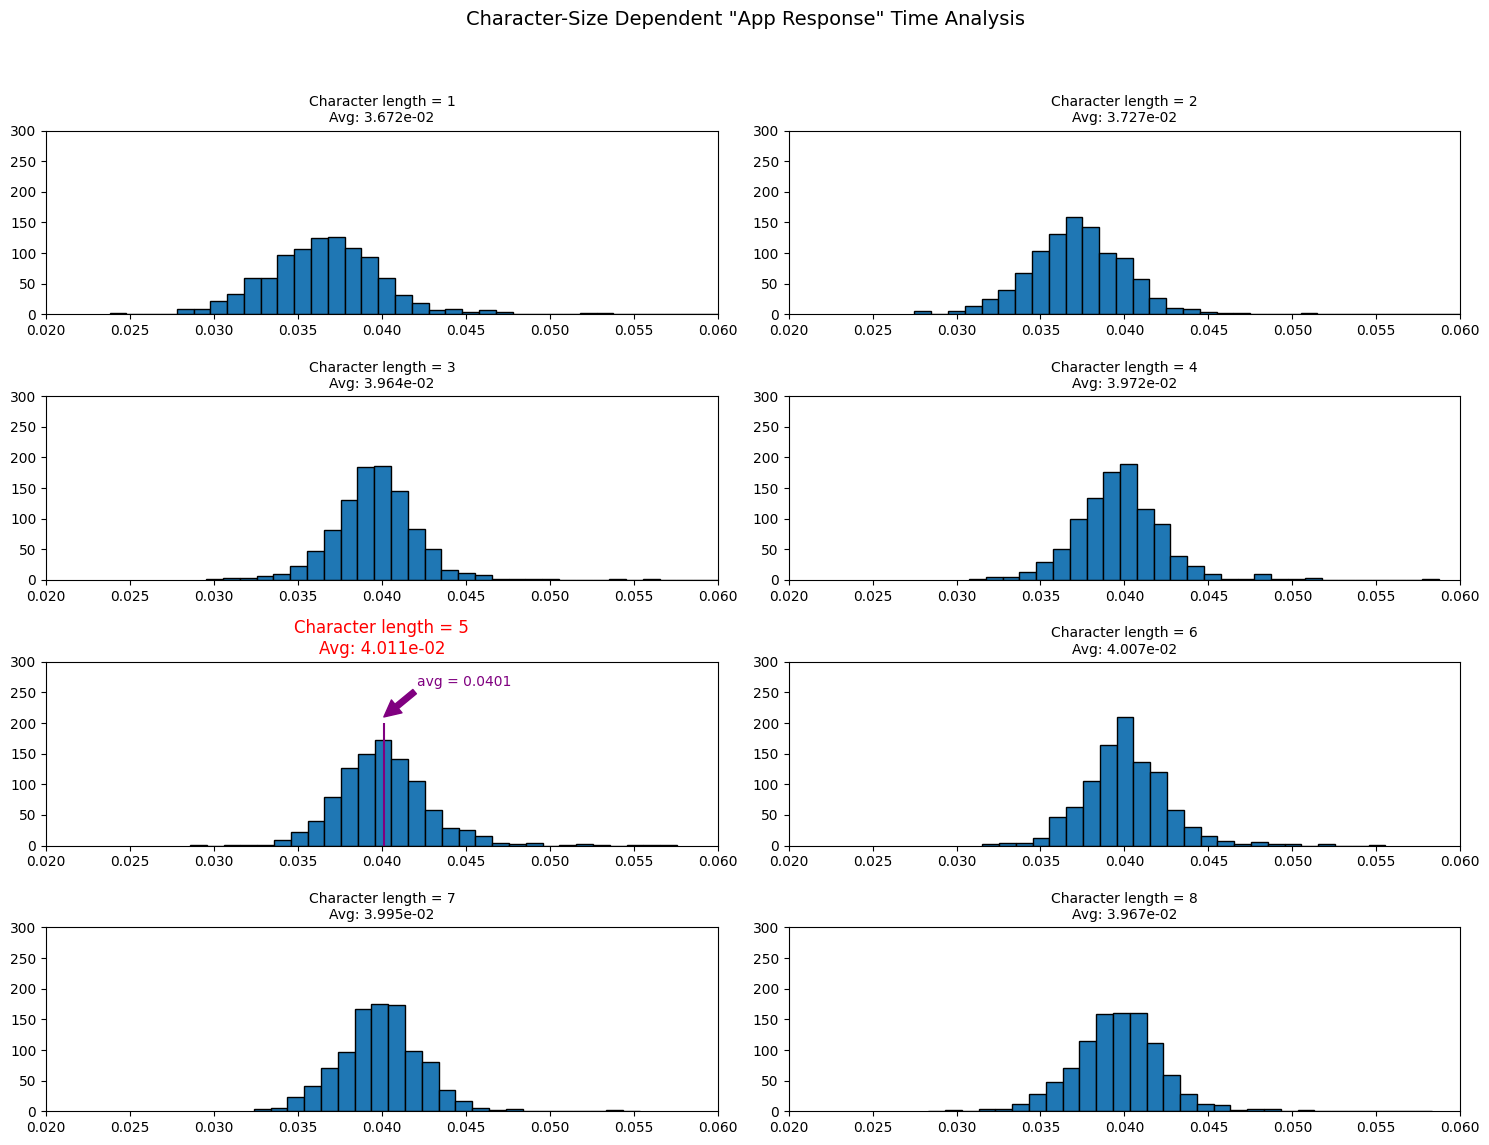

In [34]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Get a list of all .txt files in the folder
txt_files = [file for file in os.listdir() if file.endswith('.txt')]

# Calculate the number of subplots needed (limited to 7 plots)
num_files = len(txt_files)
num_rows = 4
num_cols = 2

# Create a grid of subplots (limited to 7 plots)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Initialize variables for tracking the histogram with the highest average
max_avg_value = -float('inf')
max_avg_ax = None

# Plot histograms for each .txt file and calculate maximum y-axis value
max_y = 0

# Initialize list to save all averages
averages_list = []
for i, txt_file in enumerate(txt_files):

    row = i // num_cols
    col = i % num_cols

    numbers = []
    with open(txt_file, 'r') as file:
        for line in file:
            numbers.append(float(line.strip()))

    # Calculate the average and save all averages in averages_list
    avg_value = np.mean(numbers)
    averages_list.append(avg_value)
    # Check if this histogram has the highest average so far
    if avg_value > max_avg_value:
        max_avg_value = avg_value
        max_avg_ax = axs[row, col]

    # Plot histogram with 1 bin per 0.001
    bins = np.arange(min(numbers), max(numbers) + 0.001, 0.001)
    counts, bins, patches = axs[row, col].hist(numbers, bins=bins, edgecolor='black')
    max_y = max(max_y, max(counts))

    # Set title for each histogram including the average value
    axs[row, col].set_title(f'Character length = {i+1}\nAvg: {avg_value:.3e}', fontsize=10)

# Set y-axis limits for all subplots
for ax in axs.flat:
    ax.set_ylim(0, 300)  # Adjust the y-axis limit as needed
    ax.set_xlim(0.02, 0.06) # Adjust the X-axis limit as needed

# Highlight the histogram with the highest average in red and plot the average as a v-line
if max_avg_ax:
    max_avg_ax.set_title(max_avg_ax.get_title(), color='red')
    max_avg_ax.annotate(f"avg = {round(max_avg_value,4)}",xy=(max_avg_value, max_y), xytext=(max_avg_value + 0.002, max_y + 50),
                        arrowprops=dict(facecolor='purple', edgecolor='purple', ),
                        fontsize=10, color='purple')
    max_avg_ax.vlines(max_avg_value, 0, 200, colors="purple")


plt.suptitle('Character-Size Dependent "App Response" Time Analysis', fontsize=14)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

output_filename = "timing_attack_histogram.png" 
plt.savefig(output_filename)

print(f"Plot saved as '{output_filename}'")

plt.show()
